# Food Classification with Deep Learning in Keras / Tensorflow
## *Computer, what am I eating anyway?*

![https://www.flickr.com/photos/torley/3294481634](https://c1.staticflickr.com/4/3360/3294481634_48b2b5baea_b.jpg)

In [1]:
from IPython.display import HTML, Image

url = 'http://stratospark.com/demos/food-101/'
el = '<' + 'iframe src="{}"'.format(url) + ' width="100%" height=600></iframe>' # prevent notebook render bug
HTML(el)

If you are reading this on GitHub, the demo looks like this. Please follow the link below to view the live demo on my blog.

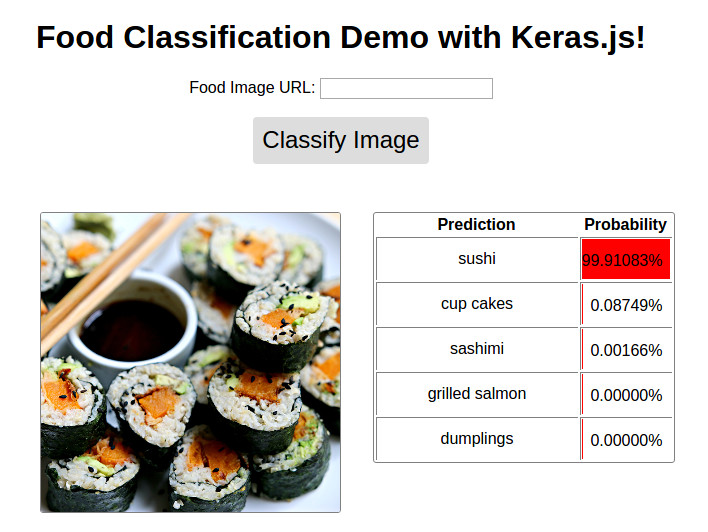

In [0]:
Image('demo.jpg')

**Demo available @ [http://blog.stratospark.com/deep-learning-applied-food-classification-deep-learning-keras.html](http://blog.stratospark.com/deep-learning-applied-food-classification-deep-learning-keras.html)**

**Code available @ [https://github.com/stratospark/food-101-keras](https://github.com/stratospark/food-101-keras)**

**UPDATES**

* **2017-03-22** Learn how to use this model in a mobile app: http://blog.stratospark.com/creating-a-deep-learning-ios-app-with-keras-and-tensorflow.html

---

* [Introduction](#Introduction)
    * [Project Description](#Project-Description)
    * [Approach](#Approach)
    * [Results](#Results)
    * [Thoughts](#Thoughts)
* [Experiment](#Experiment)
    * [Loading and Preprocessing Dataset](#Loading-and-Preprocessing-Dataset)
    * [Visualization Tools](#Visualization-Tools)
    * [Image Augmentation](#Image-Augmentation)
    * [Training](#Training)
    * [Model Evaluation](#Model-Evaluation)
    * [Results Visualization](#Results-Visualization)
    * [Interactive Classification](#Interactive-Classification)
    * [Keras.js Export](#Keras.js-Export)

## Introduction

Convolutional Neural Networks (CNN), a technique within the broader Deep Learning field, have been a revolutionary force in Computer Vision applications, especially in the past half-decade or so. One main use-case is that of image classification, e.g. determining whether a picture is that of a dog or cat. 

![Convolutional Neural Network](https://upload.wikimedia.org/wikipedia/commons/6/63/Typical_cnn.png)

You don't have to limit yourself to a binary classifier of course; CNNs can easily scale to thousands of different classes, as seen in the well-known ImageNet dataset of 1000 classes, used to benchmark computer vision algorithm performance.

<div style='margin: auto; width: 75%;'>
<img style='display: inline;' src='https://upload.wikimedia.org/wikipedia/commons/a/a4/TensorFlowLogo.png'/>
<img style='display: inline;' src='https://upload.wikimedia.org/wikipedia/commons/c/c9/Keras_Logo.jpg'/>
</div>

In the past couple of years, these cutting edge techniques have started to become available to the broader software development community. Industrial strength packages such as [Tensorflow](https://www.tensorflow.org/) have given us the same building blocks that Google uses to write deep learning applications for embedded/mobile devices to scalable clusters in the cloud -- *Without having to handcode the GPU matrix operations, partial derivative gradients, and stochastic optimizers that make efficient applications possible.*

On top of all of this, are user-friendly APIs such as [Keras](https://keras.io/) that abstract away some of the lower level details and allow us to focus on rapidly prototyping a deep learning computation graph. Much like we would mix and match Legos to get a desired result.

### Project Description

As an introductory project for myself, I chose to use a pre-trained image classifier that comes with Keras, and retrain it on a dataset that I find interesting. I'm very much into good food and home cooking, so something along those lines was appetizing.

In the paper, [Food-101 – Mining Discriminative Components with Random Forests](https://www.vision.ee.ethz.ch/datasets_extra/food-101/), they introduce the Food-101 dataset. There are 101 different classes of food, with 1000 labeled images per class available for supervised training. 

![Food-101 cover image](https://www.vision.ee.ethz.ch/datasets_extra/food-101/static/img/food-101.jpg)

### Approach

I was inspired by this Keras blog post: [Building powerful image classification models using very little data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html), and a related script I found on github: [keras-finetuning](https://github.com/danielvarga/keras-finetuning).

I built a system recently for the purpose of experimenting with Deep Learning. The key components are an Nvidia Titan X Pascal w/12 GB of memory, 96 GB of system RAM, as well as a 12-core Intel Core i7. It is running 64-bit Ubuntu 16.04 and using the Anaconda Python distribution. Unfortunately, you won't be able to follow along with this notebook on your own system unless you have enough RAM. In the future, I would like to learn how to handle larger than RAM datasets in a performant way. **Please get in touch if you have any ideas!**

I've spent about 1 month on and off building this project, trying to train dozens of models and exploring various areas such as multiprocessing for faster image augmentation. This is a cleaned up version of the notebook that contains my best performing model as of Jan 22, 2017.

### Results

After fine-tuning a pre-trained Google [InceptionV3](https://keras.io/applications/#inceptionv3) model, I was able to achieve about **82.03% Top-1 Accuracy** on the test set using a single crop per item. Using 10 crops per example and taking the most frequent predicted class(es), I was able to achieve **86.97% Top-1 Accuracy** and **97.42% Top-5 Accuracy**

Others have been able to achieve more accurate results:
* **InceptionV3: 88.28% Top-1 Accuracy** with unknown-crops. [Hassannejad, Hamid, et al. "Food Image Recognition Using Very Deep Convolutional Networks." Proceedings of the 2nd International Workshop on Multimedia Assisted Dietary Management. ACM, 2016.](http://dl.acm.org/citation.cfm?id=2986042)
* **ResNet200: 90.14% Top-1 Accuracy** on the Food-101 dataset augmented with 19 Korean dishes. [NVIDIA DEEP LEARNING CONTEST 2016, Keun-dong Lee, DaUn Jeong, Seungjae Lee, Hyung Kwan Son (ETRI VisualBrowsing Team), Oct.7, 2016.](https://www.gputechconf.co.kr/assets/files/presentations/2-1650-1710_DL_Contest_%EC%A7%80%EC%A0%95%EC%A3%BC%EC%A0%9C_%EB%8C%80%EC%83%81.pdf)
* **WISeR: 90.27% Top-1 Accuracy** with 10-crops. [Martinel, Niki, Gian Luca Foresti, and Christian Micheloni. "Wide-Slice Residual Networks for Food Recognition." arXiv preprint arXiv:1612.06543 (2016).](https://arxiv.org/pdf/1612.06543.pdf)

### Thoughts

* Loading a large amount of data into memory, how to avoid?
* Saving the data into h5py file for out of band processing?
* Using Dask for distributed processing?
* Improving multiprocessing image augmentation?

---
* Exporting to Tensorflow [mobile app](https://www.tensorflow.org/mobile/)? 

**Implemented! Check out: http://blog.stratospark.com/creating-a-deep-learning-ios-app-with-keras-and-tensorflow.html**

## Experiment

### Loading and Preprocessing Dataset

Let's import all of the packages needed for the rest of the notebook:

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
# from scipy.misc import imresize

%matplotlib inline

import os
from os import listdir
from os.path import isfile, join
import shutil
import stat
import collections
from collections import defaultdict

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import cv2
import h5py
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.applications.inception_v3 import preprocess_input
from keras.models import load_model

Using TensorFlow backend.


Download the dataset and extract it within the notebook folder. It may be easier to do this in a separate terminal window.

In [0]:
# !wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz

In [0]:
# !tar xzvf food-101.tar.gz

Let's see what sort of foods are represented here:

In [2]:
!dir C:\data\VIREO\food224\train

 Volume in drive C has no label.
 Volume Serial Number is 10DF-6852

 Directory of C:\data\VIREO\food224\train

04/02/2019  08:34 AM    <DIR>          .
04/02/2019  08:34 AM    <DIR>          ..
04/01/2019  01:30 PM    <DIR>          01
04/01/2019  01:31 PM    <DIR>          02
04/01/2019  01:59 PM    <DIR>          03
               0 File(s)              0 bytes
               5 Dir(s)  18,374,410,240 bytes free


In [3]:
!dir C:\data\VIREO\food224\train\01\

 Volume in drive C has no label.
 Volume Serial Number is 10DF-6852

 Directory of C:\data\VIREO\food224\train\01

04/01/2019  01:30 PM    <DIR>          .
04/01/2019  01:30 PM    <DIR>          ..
04/01/2019  09:08 AM            24,679 1.jpg
04/01/2019  09:08 AM            18,095 1_0.jpg
04/01/2019  09:08 AM            15,381 1_10.jpg
04/01/2019  09:08 AM            18,669 1_12.jpg
04/01/2019  09:08 AM            20,372 1_13.jpg
04/01/2019  09:08 AM            17,527 1_14.jpg
04/01/2019  09:08 AM            15,857 1_15.jpg
04/01/2019  09:08 AM            17,219 1_18.jpg
04/01/2019  09:08 AM            15,735 1_19.jpg
04/01/2019  09:08 AM            17,445 1_2.jpg
04/01/2019  09:08 AM            15,056 1_20.jpg
04/01/2019  09:08 AM            19,847 1_22.jpg
04/01/2019  09:08 AM            16,622 1_23.jpg
04/01/2019  09:08 AM            14,535 1_24.jpg
04/01/2019  09:08 AM            19,193 1_25.jpg
04/01/2019  09:08 AM            22,739 1_27.jpg
04/01/2019  09:08 AM            21,392 

Let's look at some random images from each food class. You can right click and open the image in a new window or save it in order to see it at a higher resolution.

A `multiprocessing.Pool` will be used to accelerate image augmentation during training.

In [2]:
# Setup multiprocessing pool
# Do this early, as once images are loaded into memory there will be Errno 12
# http://stackoverflow.com/questions/14749897/python-multiprocessing-memory-usage
import multiprocessing as mp

num_processes = 6
pool = mp.Pool(processes=num_processes)

We need maps from class to index and vice versa, for proper label encoding and pretty printing.

In [11]:
root_dir = "D:\Metwalli\\master\\reasearches proposals\\Computer vision\\Materials\\VIREO"
data_dir = os.path.join(root_dir, "ready_chinese_food")
class_to_ix = {}
ix_to_class = {}
classes = os.listdir(root_dir)
class_to_ix = dict(zip(classes, range(len(classes))))
ix_to_class = dict(zip(range(len(classes)), classes))
class_to_ix = {v: k for k, v in ix_to_class.items()}
sorted_class_to_ix = collections.OrderedDict(sorted(class_to_ix.items()))
# ----
with open(os.path.join(root_dir, 'SplitAndIngreLabel\\FoodList.txt'), 'r') as txt:
    classes_names = [l.strip() for l in txt.readlines()]

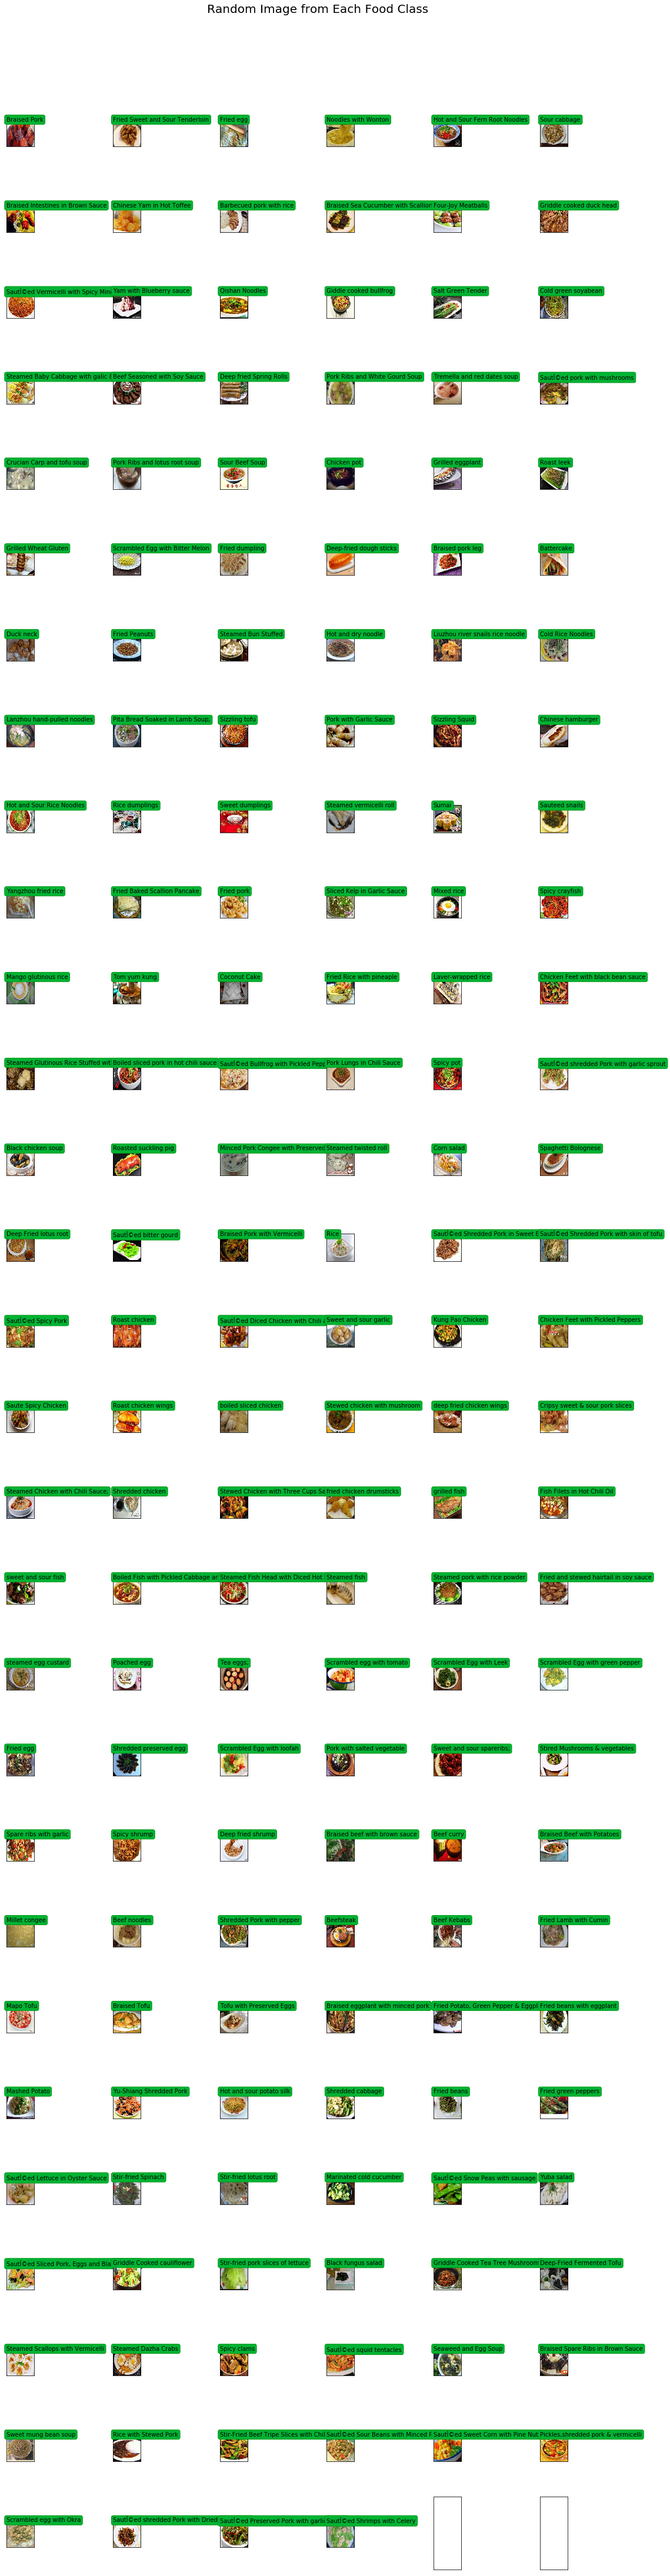

In [13]:

rows = 29
cols = 6
fig, ax = plt.subplots(rows, cols, frameon=False, figsize=(15, 64))
fig.suptitle('Random Image from Each Food Class', fontsize=20)
sorted_food_dirs = sorted(os.listdir(data_dir))
for i in range(rows):
    for j in range(cols):
        try:
            food_dir = sorted_food_dirs[i*cols + j]
        except:
            break
        all_files = os.listdir(os.path.join(data_dir, food_dir))
        rand_img = np.random.choice(all_files)
        img = plt.imread(os.path.join(data_dir, food_dir, rand_img))
        ax[i][j].imshow(img)
        ec = (0, .6, .1)
        fc = (0, .7, .2)
        ax[i][j].text(0, -20, classes_names[int(food_dir)-1], size=10, rotation=0,
                ha="left", va="top", 
                bbox=dict(boxstyle="round", ec=ec, fc=fc))
plt.setp(ax, xticks=[], yticks=[])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [7]:
print(ix_to_class)

{0: '1', 1: '10', 2: '100', 3: '101', 4: '102', 5: '103', 6: '104', 7: '105', 8: '106', 9: '107', 10: '108', 11: '109', 12: '11', 13: '110', 14: '111', 15: '112', 16: '113', 17: '114', 18: '115', 19: '116', 20: '117', 21: '118', 22: '119', 23: '12', 24: '120', 25: '121', 26: '122', 27: '123', 28: '124', 29: '125', 30: '126', 31: '127', 32: '128', 33: '129', 34: '13', 35: '130', 36: '131', 37: '132', 38: '133', 39: '134', 40: '135', 41: '136', 42: '137', 43: '138', 44: '139', 45: '14', 46: '140', 47: '141', 48: '142', 49: '143', 50: '144', 51: '145', 52: '146', 53: '147', 54: '148', 55: '149', 56: '15', 57: '150', 58: '151', 59: '152', 60: '153', 61: '154', 62: '155', 63: '156', 64: '157', 65: '158', 66: '159', 67: '16', 68: '160', 69: '161', 70: '162', 71: '163', 72: '164', 73: '165', 74: '166', 75: '167', 76: '168', 77: '169', 78: '17', 79: '170', 80: '171', 81: '172', 82: '18', 83: '19', 84: '2', 85: '20', 86: '21', 87: '22', 88: '23', 89: '24', 90: '25', 91: '26', 92: '27', 93: '28'

The Food-101 dataset has a provided train/test split. We want to use this in order to compare our classifcation performance with other implementations.

We are now ready to load the training and testing images into memory. After everything is loaded, about 80 GB of memory will be allocated.

Any images that have a width or length smaller than `min_size` will be resized. This is so that we can take proper-sized crops during image augmentation.

In [38]:
%%time
from keras.preprocessing.image import img_to_array
# Load dataset images and resize to meet minimum width and height pixel size
def load_images(root, min_side=299):
    all_imgs = []
    all_classes = []
    resize_count = 0
    invalid_count = 0
    for i, subdir in enumerate(listdir(root)):
        imgs = listdir(join(root, subdir))
        class_ix = class_to_ix[subdir]
        print(i, class_ix, subdir)
        for img_name in imgs:
            image = cv2.cvtColor(cv2.imread(join(root, subdir, img_name)), cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (min_side, min_side))
#             image = img_to_array(image)
            all_imgs.append(image)
            all_classes.append(class_ix)
#             img_arr = img.imread(join(root, subdir, img_name))
#             img_arr_rs = img_arr
#             try:
#                 w, h, _ = img_arr.shape
#                 if w < min_side:
#                     wpercent = (min_side/float(w))
#                     hsize = int((float(h)*float(wpercent)))
#                     #print('new dims:', min_side, hsize)
#                     img_arr_rs = imresize(img_arr, (min_side, hsize))
#                     resize_count += 1
#                 elif h < min_side:
#                     hpercent = (min_side/float(h))
#                     wsize = int((float(w)*float(hpercent)))
#                     #print('new dims:', wsize, min_side)
#                     img_arr_rs = imresize(img_arr, (wsize, min_side))
#                     resize_count += 1
#                 all_imgs.append(img_arr_rs)
#                 all_classes.append(class_ix)
#             except:
#                 print('Skipping bad image: ', subdir, img_name)
#                 invalid_count += 1
    print(len(all_imgs), 'images loaded')
    print(resize_count, 'images resized')
    print(invalid_count, 'images skipped')
    return np.array(all_imgs), np.array(all_classes)
    
X_test, y_test = load_images(join(root_dir,"test"), min_side=224)

0 0 1
1 1 10
2 2 100


KeyboardInterrupt: 

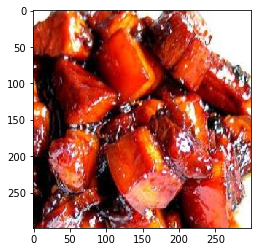

In [27]:
import tensorflow as tf
from keras.preprocessing.image import img_to_array
all_imgs = []
x = "C:\\data\\VIREO\\food224\\train\\01\\1.jpg"
image = cv2.cvtColor(cv2.imread(x), cv2.COLOR_BGR2RGB)
# image = plt.imread(x)
# all_imgs.append(image)
# image = cv2.imread("C:\\data\\VIREO\\food224\\train\\01\\1_0.jpg")
# all_imgs.append(image)
# x= np.array(all_imgs)
# cv2.imshow('image',image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# img = np.reshape(image, (image.shape[0], image.shape[1], 3))
# image = img_to_array(image)
plt.imshow(image)

In [25]:
print(x.shape)

(2, 299, 299, 3)


In [27]:
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

NameError: name 'X_test' is not defined

### Visualization Tools

class: 21 chocolate_cake


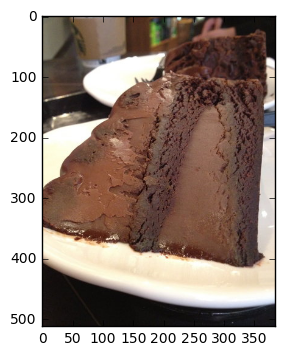

In [0]:
@interact(n=(0, len(X_test)))
def show_pic(n):
    plt.imshow(X_test[n])
    print('class:', y_test[n], ix_to_class[y_test[n]])

0


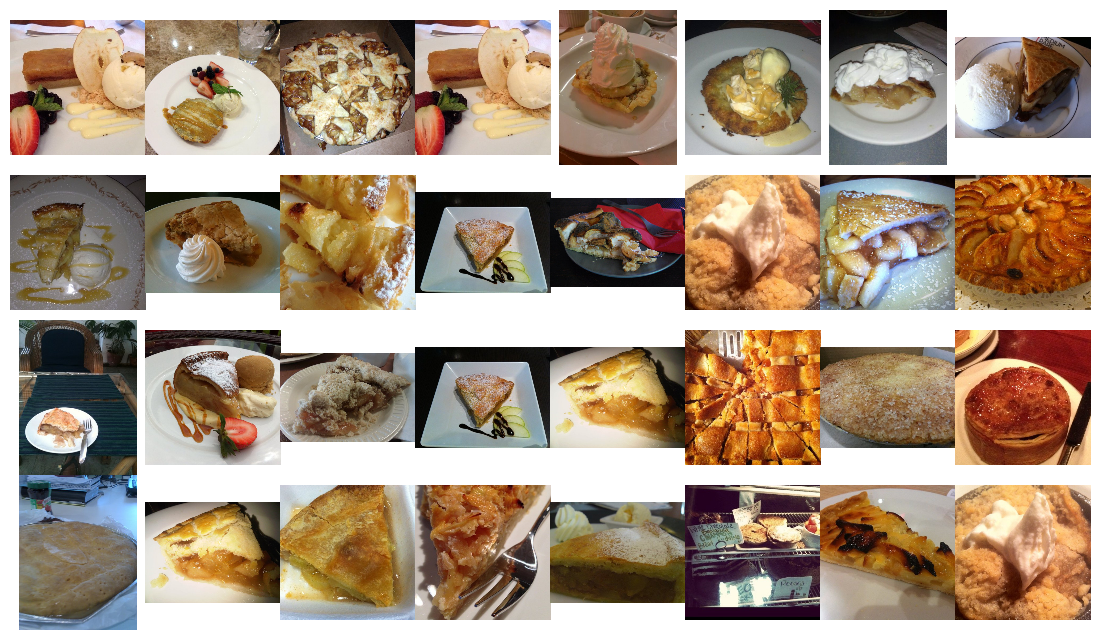

In [0]:
@interact(n_class=sorted_class_to_ix)
def show_random_images_of_class(n_class=0):
    print(n_class)
    nrows = 4
    ncols = 8
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
    fig.set_size_inches(12, 8)
    #fig.tight_layout()
    imgs = np.random.choice((y_test == n_class).nonzero()[0], nrows * ncols)
    for i, ax in enumerate(axes.flat):
        im = ax.imshow(X_test[imgs[i]])
        ax.set_axis_off()
        ax.title.set_visible(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        for spine in ax.spines.values():
            spine.set_visible(False)
    plt.subplots_adjust(left=0, wspace=0, hspace=0)
    plt.show()


### Image Augmentation

We need to one-hot encode each label value to create a vector of binary features rather than one feature that can take on `n_classes` values.

In [0]:
from keras.utils.np_utils import to_categorical

n_classes = 172
# y_train_cat = to_categorical(y_train, nb_classes=n_classes)
y_test_cat = to_categorical(y_test, nb_classes=n_classes)

In [40]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.layers import Input

import tools.image_gen_extended as T

# Useful for checking the output of the generators after code change
#from importlib import reload
#reload(T)

I needed to have a more powerful Image Augmentation pipeline than the one that ships with Keras. Luckily, I was able to find this [modified version](https://github.com/fchollet/keras/issues/3338) to use as my base. 

The author had added an extensible pipeline, which made it possible to specify additional modifications such as custom cropping functions and being able to use the Inception image preprocessor. Being able to apply preprocessing dynamically was necessary, as I did not have enough memory to keep all of the training set as `float32s`. I was able to load the entire training set as `uint8s`.

Furthermore, I was not fully utilizing either my GPU or my multicore CPU. By default, Python is only able to use a single core, thereby limiting the amount of processed/augmented images I could send to the GPU for training. Based on some performance monitoring, I was only using a small percentage of the GPU on average. By incorporating a python `multiprocessing Pool`, I was able to get about 50% CPU utilization and 90% GPU utilization.

The end result is that each epoch of training went from 45 minutes to 22 minutes! You can run the GPU graphs yourselves while training in this [notebook](nvidia-gpu-monitor.ipynb). The inspiration for trying to improve data augmentation and GPU performance came from [Jimmie Goode: Buffered Python generators for data augmentation](http://jimgoo.com/buffered-gens/)

At the moment, the code is fairly buggy and requires restarting the Python kernel whenever training is manually interrupted. The code is quite hacked together and certain features, like those that involve fitting, are disabled. I hope to improve this ImageDataGenerator and release it to the community in the future.

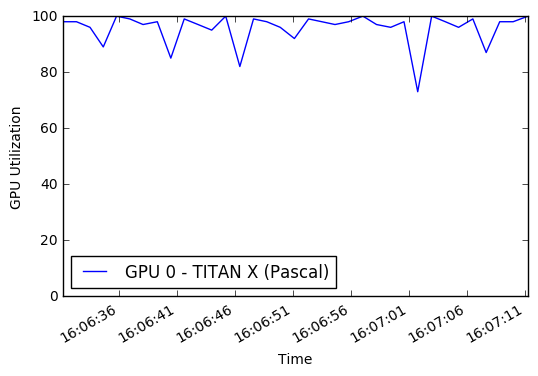

In [0]:
display(Image('./gpu.png'))

In [0]:
test_datagen = T.ImageDataGenerator()
test_datagen.config['random_crop_size'] = (299, 299)
test_datagen.set_pipeline([T.random_transform, T.random_crop, T.preprocess_input])
test_generator = test_datagen.flow(X_test, y_test_cat, batch_size=64, seed=11, pool=pool)

We can see what sorts of images are coming out of these ImageDataGenerators:

In [0]:
def reverse_preprocess_input(x0):
    x = x0 / 2.0
    x += 0.5
    x *= 255.
    return x

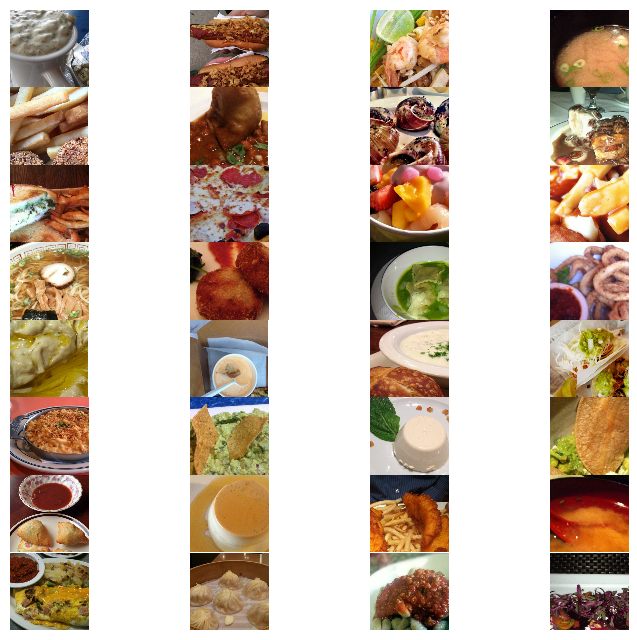

CPU times: user 1.54 s, sys: 524 ms, total: 2.06 s
Wall time: 2.24 s


In [0]:
%%time
@interact()
def show_images(unprocess=True):
    for x in test_generator:
        fig, axes = plt.subplots(nrows=8, ncols=4)
        fig.set_size_inches(8, 8)
        page = 0
        page_size = 32
        start_i = page * page_size
        for i, ax in enumerate(axes.flat):
            img = x[0][i+start_i]
            if unprocess:
                im = ax.imshow( reverse_preprocess_input(img).astype('uint8') )
            else:
                im = ax.imshow(img)
            ax.set_axis_off()
            ax.title.set_visible(False)
            ax.xaxis.set_ticks([])
            ax.yaxis.set_ticks([])
            for spine in ax.spines.values():
                spine.set_visible(False)

        plt.subplots_adjust(left=0, wspace=0, hspace=0)
        plt.show()
        break

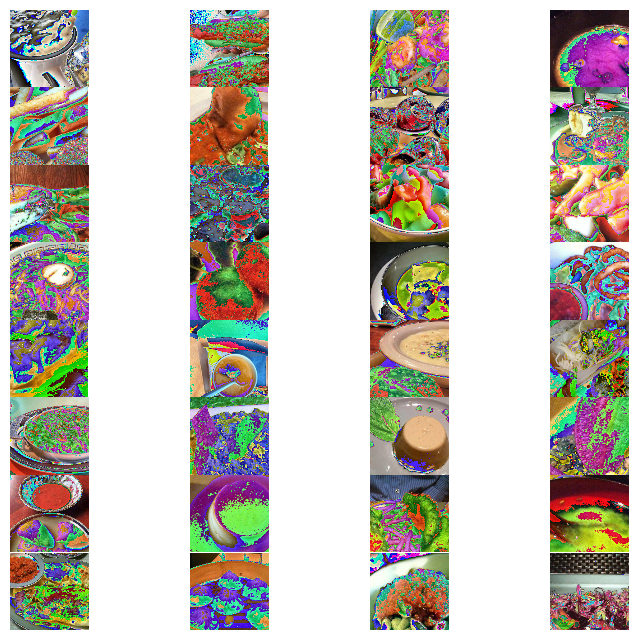

CPU times: user 1.58 s, sys: 300 ms, total: 1.88 s
Wall time: 2.11 s


In [0]:
%%time
show_images(unprocess=False)

### Model Evaluation

At this point, we should have multiple trained models saved to disk. We can go through them and use the `load_model` function to load the model with the lowest loss / highest accuracy.

In [0]:
%%time
model = load_model(filepath='./experiments/172/proposed/best.wieghts.hdf5') # 86.9703

CPU times: user 36.4 s, sys: 1.11 s, total: 37.5 s
Wall time: 36.5 s


We also want to evaluate the test set using multiple crops. This can yield an accuracy boost of 5% compared to single crop evaluation. It is common to use the following crops: Upper Left, Upper Right, Lower Left, Lower Right, Center. We also take the same crops on the image flipped left to right, creating a total of 10 crops. 

In addition, we want to return the top-N predictions for each crop in order to calculate Top-5 accuracy, for instance.

In [0]:
def center_crop(x, center_crop_size, **kwargs):
    centerw, centerh = x.shape[0]//2, x.shape[1]//2
    halfw, halfh = center_crop_size[0]//2, center_crop_size[1]//2
    return x[centerw-halfw:centerw+halfw+1,centerh-halfh:centerh+halfh+1, :]

Top-1 Predicted: [74 74 74 74 74 74 74 74 74 74]
Top-5 Predicted: [[33 97 37 39 74]
 [28 52 37 39 74]
 [73 39 52 37 74]
 [35 33 37 39 74]
 [35 33 37 39 74]
 [35 33 37 39 74]
 [35 33 37 39 74]
 [97 37 73 39 74]
 [73 52 37 39 74]
 [34 35 33 39 74]]
True Label: 88


(array([74, 74, 74, 74, 74, 74, 74, 74, 74, 74]), array([[33, 97, 37, 39, 74],
        [28, 52, 37, 39, 74],
        [73, 39, 52, 37, 74],
        [35, 33, 37, 39, 74],
        [35, 33, 37, 39, 74],
        [35, 33, 37, 39, 74],
        [35, 33, 37, 39, 74],
        [97, 37, 73, 39, 74],
        [73, 52, 37, 39, 74],
        [34, 35, 33, 39, 74]]))

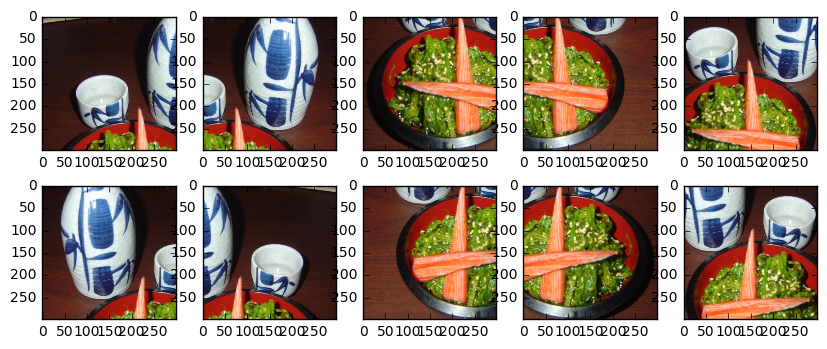

In [0]:
def predict_10_crop(img, ix, top_n=5, plot=False, preprocess=True, debug=False):
    flipped_X = np.fliplr(img)
    crops = [
        img[:299,:299, :], # Upper Left
        img[:299, img.shape[1]-299:, :], # Upper Right
        img[img.shape[0]-299:, :299, :], # Lower Left
        img[img.shape[0]-299:, img.shape[1]-299:, :], # Lower Right
        center_crop(img, (299, 299)),
        
        flipped_X[:299,:299, :],
        flipped_X[:299, flipped_X.shape[1]-299:, :],
        flipped_X[flipped_X.shape[0]-299:, :299, :],
        flipped_X[flipped_X.shape[0]-299:, flipped_X.shape[1]-299:, :],
        center_crop(flipped_X, (299, 299))
    ]
    if preprocess:
        crops = [preprocess_input(x.astype('float32')) for x in crops]

    if plot:
        fig, ax = plt.subplots(2, 5, figsize=(10, 4))
        ax[0][0].imshow(crops[0])
        ax[0][1].imshow(crops[1])
        ax[0][2].imshow(crops[2])
        ax[0][3].imshow(crops[3])
        ax[0][4].imshow(crops[4])
        ax[1][0].imshow(crops[5])
        ax[1][1].imshow(crops[6])
        ax[1][2].imshow(crops[7])
        ax[1][3].imshow(crops[8])
        ax[1][4].imshow(crops[9])
    
    y_pred = model.predict(np.array(crops))
    preds = np.argmax(y_pred, axis=1)
    top_n_preds= np.argpartition(y_pred, -top_n)[:,-top_n:]
    if debug:
        print('Top-1 Predicted:', preds)
        print('Top-5 Predicted:', top_n_preds)
        print('True Label:', y_test[ix])
    return preds, top_n_preds

    
ix = 13001
predict_10_crop(X_test[ix], ix, top_n=5, plot=True, preprocess=False, debug=True)

We also need to preprocess the images for the Inception model:

Top-1 Predicted: [51 51 88 88 88 51 51 88 88 88]
Top-5 Predicted: [[18 79 51 13 48]
 [48 79 11 55 51]
 [79 93 81 37 88]
 [51 86 93 81 88]
 [11 79 51 81 88]
 [19 79 51 56 13]
 [11 88 48 51 13]
 [37 93 86 88 81]
 [37 79 93 88 81]
 [84 81 11 79 88]]
True Label: 88


(array([51, 51, 88, 88, 88, 51, 51, 88, 88, 88]), array([[18, 79, 51, 13, 48],
        [48, 79, 11, 55, 51],
        [79, 93, 81, 37, 88],
        [51, 86, 93, 81, 88],
        [11, 79, 51, 81, 88],
        [19, 79, 51, 56, 13],
        [11, 88, 48, 51, 13],
        [37, 93, 86, 88, 81],
        [37, 79, 93, 88, 81],
        [84, 81, 11, 79, 88]]))

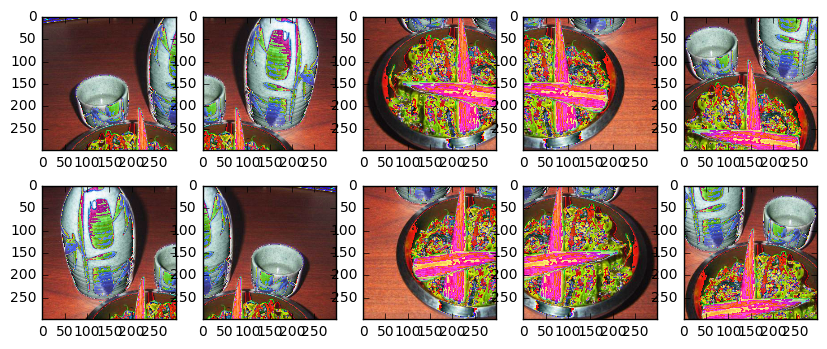

In [0]:
ix = 13001
predict_10_crop(X_test[ix], ix, top_n=5, plot=True, preprocess=True, debug=True)

Now we create crops for each item in the test set and get the predictions. This is a slow process at the moment as I am not taking advantage of multiprocessing or other types of parallelism.

In [0]:
%%time
preds_10_crop = {}
for ix in range(len(X_test)):
    if ix % 1000 == 0:
        print(ix)
    preds_10_crop[ix] = predict_10_crop(X_test[ix], ix)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
CPU times: user 50min 3s, sys: 5min 13s, total: 55min 16s
Wall time: 31min 28s


We now have a set of 10 predictions for each image. Using a histogram, I'm able to see how the # of unique predictions for each image are distributed.

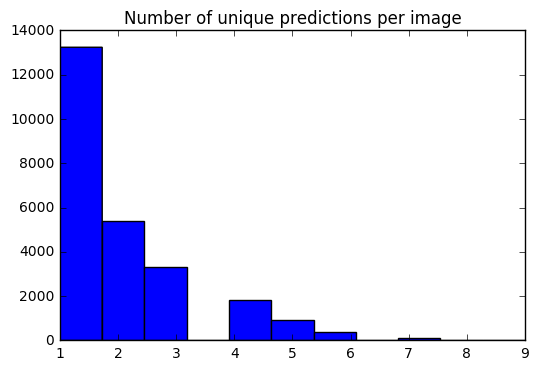

In [0]:
preds_uniq = {k: np.unique(v[0]) for k, v in preds_10_crop.items()}
preds_hist = np.array([len(x) for x in preds_uniq.values()])

plt.hist(preds_hist, bins=11)
plt.title('Number of unique predictions per image')

Let's create a dictionary to map test item index to its top-1 / top-5 predictions.

In [0]:
preds_top_1 = {k: collections.Counter(v[0]).most_common(1) for k, v in preds_10_crop.items()}

top_5_per_ix = {k: collections.Counter(preds_10_crop[k][1].reshape(-1)).most_common(5) 
                for k, v in preds_10_crop.items()}
preds_top_5 = {k: [y[0] for y in v] for k, v in top_5_per_ix.items()}

In [0]:
%%time
right_counter = 0
for i in range(len(y_test)):
    guess, actual = preds_top_1[i][0][0], y_test[i]
    if guess == actual:
        right_counter += 1
        
print('Top-1 Accuracy, 10-Crop: {0:.2f}%'.format(right_counter / len(y_test) * 100))

Top-1 Accuracy, 10-Crop: 86.97%
CPU times: user 28 ms, sys: 0 ns, total: 28 ms
Wall time: 27.3 ms


In [0]:
%%time
top_5_counter = 0
for i in range(len(y_test)):
    guesses, actual = preds_top_5[i], y_test[i]
    if actual in guesses:
        top_5_counter += 1
        
print('Top-5 Accuracy, 10-Crop: {0:.2f}%'.format(top_5_counter / len(y_test) * 100))

Top-5 Accuracy, 10-Crop: 97.42%
CPU times: user 28 ms, sys: 0 ns, total: 28 ms
Wall time: 27 ms


### Results Visualization

In [0]:
y_pred = [x[0][0] for x in preds_top_1.values()]

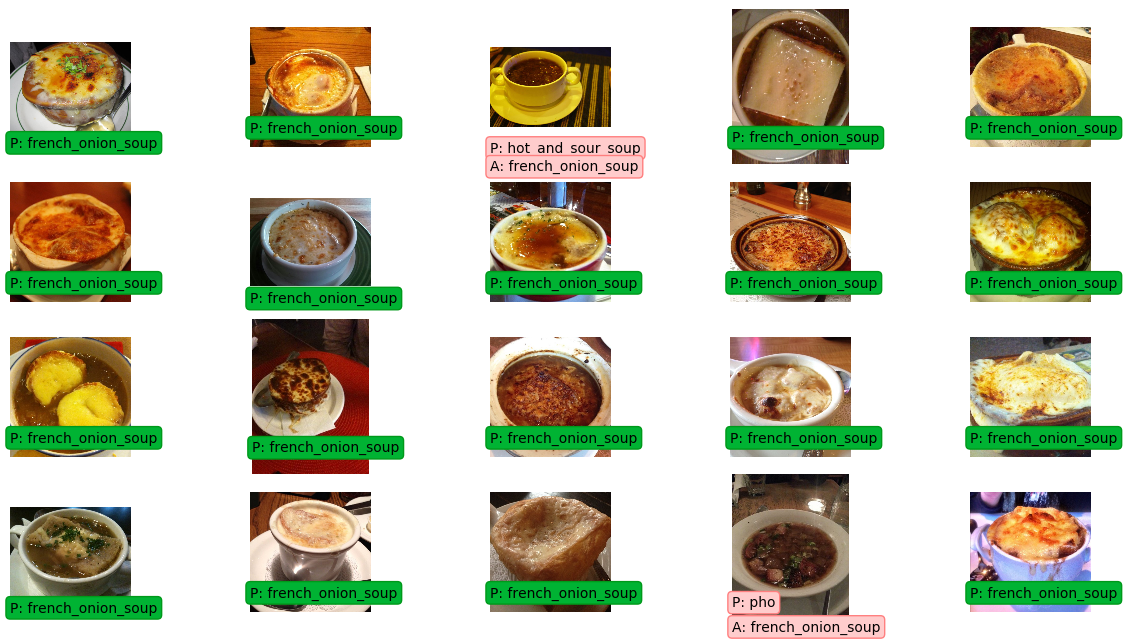

In [0]:
with open('D:\Metwalli\\master\\reasearches proposals\\Computer vision\\Materials\\VIREO\\SplitAndIngreLabel\\FoodList.txt', 'r') as txt:
    classes_names = [l.strip() for l in txt.readlines()]
@interact(page=[0, int(len(X_test)/20)])
def show_images_prediction(page=0):
    page_size = 20
    nrows = 4
    ncols = 5
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 12))
    fig.set_size_inches(12, 8)
    #fig.tight_layout()
    #imgs = np.random.choice((y_all == n_class).nonzero()[0], nrows * ncols)
    start_i = page * page_size
    for i, ax in enumerate(axes.flat):
        im = ax.imshow(X_test[i+start_i])
        ax.set_axis_off()
        ax.title.set_visible(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        for spine in ax.spines.values():
            spine.set_visible(False)
        predicted = ix_to_class[y_pred[i+start_i]]
        match = predicted ==  ix_to_class[y_test[start_i + i]]
        ec = (1, .5, .5)
        fc = (1, .8, .8)
        if match:
            ec = (0, .6, .1)
            fc = (0, .7, .2)
        # predicted label
        ax.text(0, 400, 'P: ' + classes_names[int(predicted)-1], size=10, rotation=0,
            ha="left", va="top",
             bbox=dict(boxstyle="round",
                   ec=ec,
                   fc=fc,
                   )
             )
        if not match:
            # true label
            ax.text(0, 480, 'A: ' + classes_names[int(ix_to_class[y_test[start_i + i]])-1], size=10, rotation=0,
                ha="left", va="top",
                 bbox=dict(boxstyle="round",
                       ec=ec,
                       fc=fc,
                       )
                 )
    plt.subplots_adjust(left=0, wspace=1, hspace=0)
    plt.show()

A confusion matrix will plot each class label and how many times it was correctly labeled vs. the other times it was incorrectly labeled as a different class.

Confusion matrix, without normalization
[[179   0   4 ...,   2   0   5]
 [  0 218   0 ...,   0   0   0]
 [  4   0 228 ...,   1   0   0]
 ..., 
 [  0   0   0 ..., 212   0   1]
 [  0   0   0 ...,   0 208   0]
 [  0   0   0 ...,   0   0 224]]


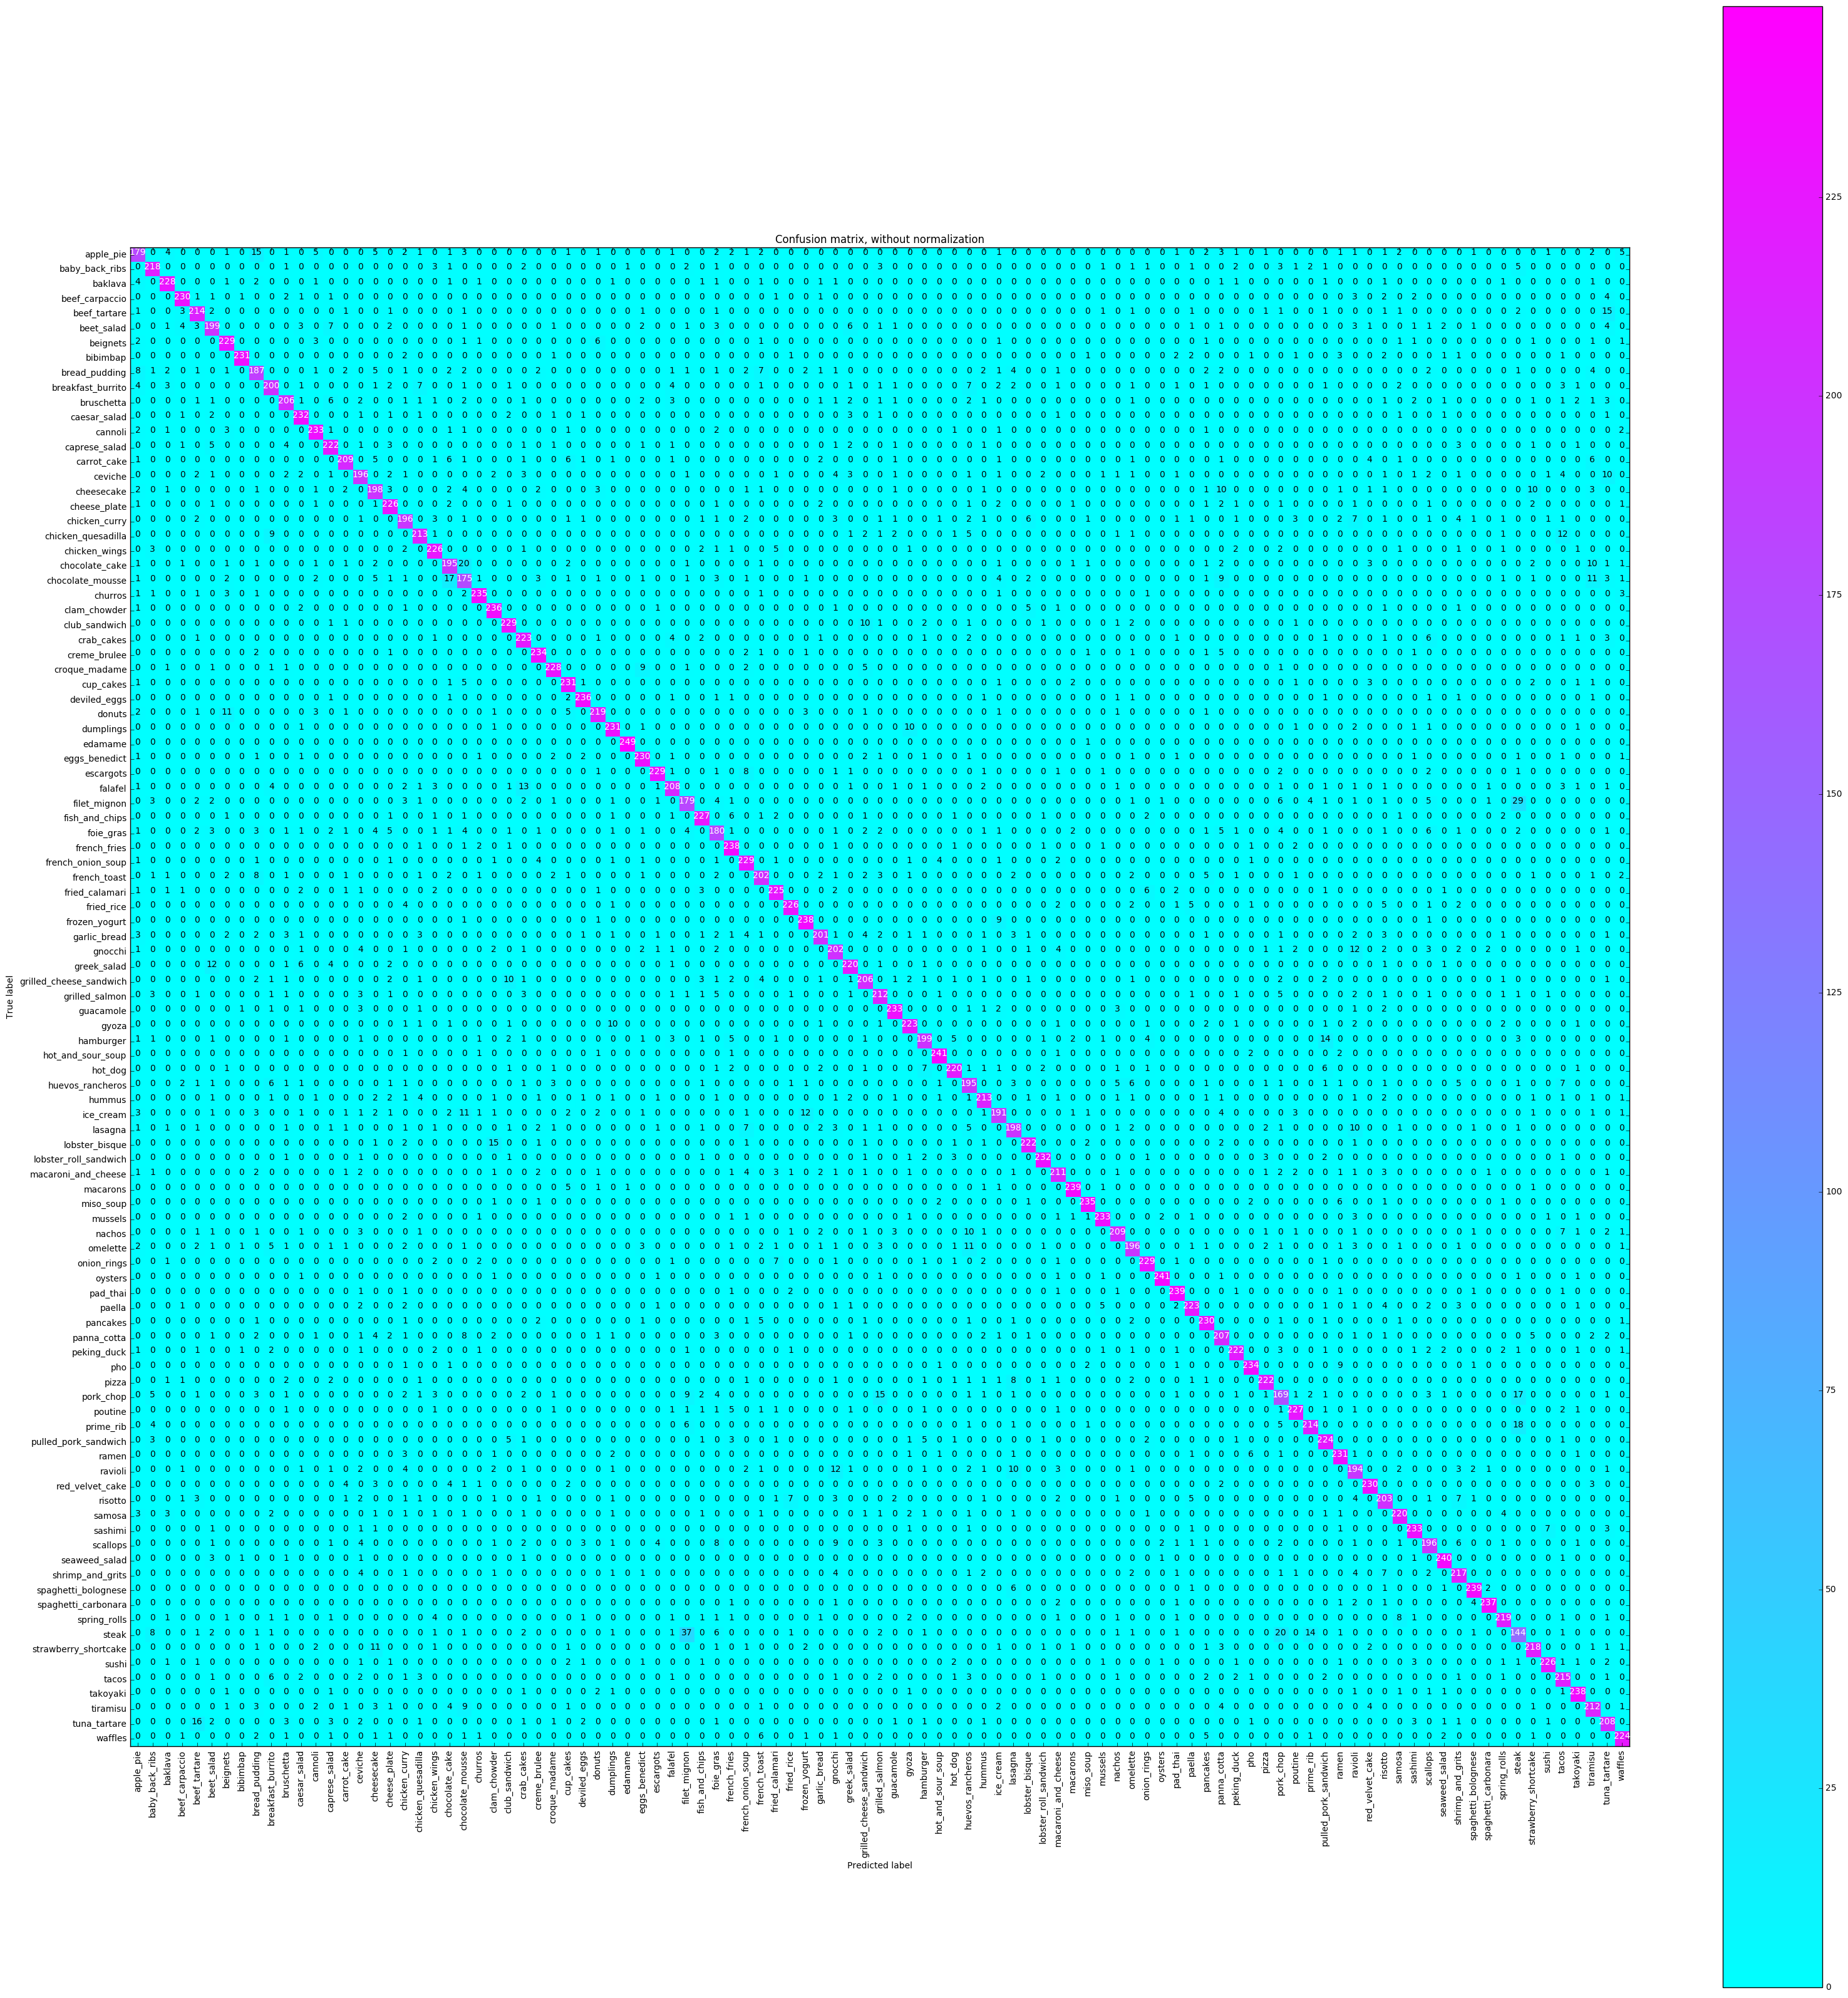

CPU times: user 16.4 s, sys: 1.22 s, total: 17.6 s
Wall time: 16.4 s


In [0]:
%%time
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

class_names = [ix_to_class[i] for i in range(101)]

plt.figure()
fig = plt.gcf()
fig.set_size_inches(32, 32)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization',
                      cmap=plt.cm.cool)
plt.show()

We want to see if the accuracy was consistent across all classes, or if some classes were much easier / harder to label than others. According to our plot, a few classes were outliers in terms of being much more difficult to label correctly.

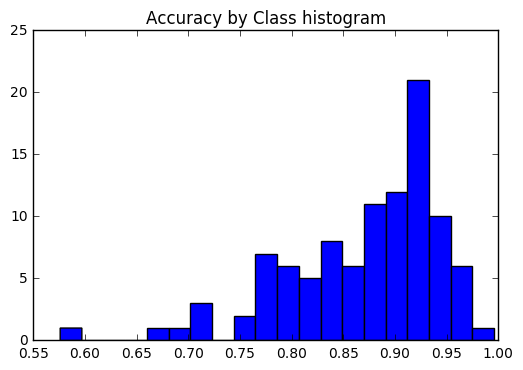

In [0]:
corrects = collections.defaultdict(int)
incorrects = collections.defaultdict(int)
for (pred, actual) in zip(y_pred, y_test):
    if pred == actual:
        corrects[actual] += 1
    else:
        incorrects[actual] += 1

class_accuracies = {}
for ix in range(172):
    class_accuracies[ix] = corrects[ix]/250

plt.hist(list(class_accuracies.values()), bins=20)
plt.title('Accuracy by Class histogram')

In [0]:
sorted_class_accuracies = sorted(class_accuracies.items(), key=lambda x: -x[1])
[(ix_to_class[c[0]], c[1]) for c in sorted_class_accuracies]

[('edamame', 0.996),
 ('hot_and_sour_soup', 0.964),
 ('oysters', 0.964),
 ('seaweed_salad', 0.96),
 ('macarons', 0.956),
 ('pad_thai', 0.956),
 ('spaghetti_bolognese', 0.956),
 ('french_fries', 0.952),
 ('frozen_yogurt', 0.952),
 ('takoyaki', 0.952),
 ('spaghetti_carbonara', 0.948),
 ('clam_chowder', 0.944),
 ('deviled_eggs', 0.944),
 ('churros', 0.94),
 ('miso_soup', 0.94),
 ('creme_brulee', 0.936),
 ('pho', 0.936),
 ('cannoli', 0.932),
 ('guacamole', 0.932),
 ('mussels', 0.932),
 ('sashimi', 0.932),
 ('caesar_salad', 0.928),
 ('lobster_roll_sandwich', 0.928),
 ('bibimbap', 0.924),
 ('cup_cakes', 0.924),
 ('dumplings', 0.924),
 ('ramen', 0.924),
 ('beef_carpaccio', 0.92),
 ('eggs_benedict', 0.92),
 ('pancakes', 0.92),
 ('red_velvet_cake', 0.92),
 ('beignets', 0.916),
 ('club_sandwich', 0.916),
 ('escargots', 0.916),
 ('french_onion_soup', 0.916),
 ('onion_rings', 0.916),
 ('baklava', 0.912),
 ('croque_madame', 0.912),
 ('fish_and_chips', 0.908),
 ('poutine', 0.908),
 ('cheese_plate', 

### Interactive Classification

Predicting from a local file

french_onion_soup


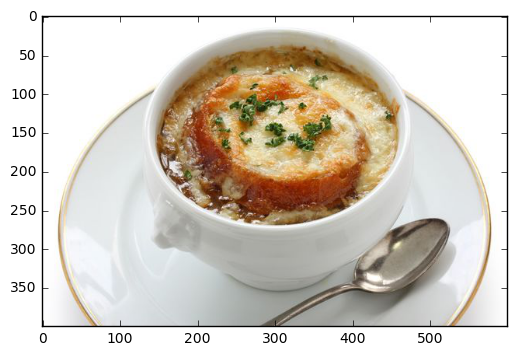

In [0]:
pic_path = '/home/stratospark/Downloads/soup.jpg'
pic = img.imread(pic_path)
preds = predict_10_crop(np.array(pic), 0)[0]
best_pred = collections.Counter(preds).most_common(1)[0][0]
print(classes_names[int(ix_to_class[best_pred])-1])
plt.imshow(pic)

Predicting from an image on the Internet

hummus


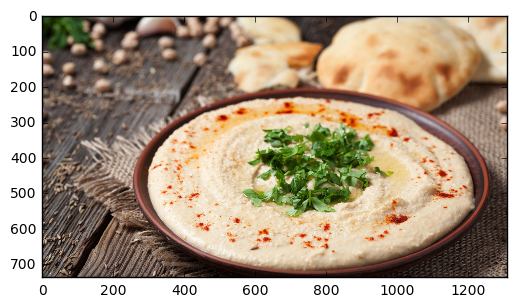

In [0]:
import urllib.request

@interact
def predict_remote_image(url='http://themodelhouse.tv/wp-content/uploads/2016/08/hummus.jpg'):
    with urllib.request.urlopen(url) as f:
        pic = plt.imread(f, format='jpg')
        preds = predict_10_crop(np.array(pic), 0)[0]
        best_pred = collections.Counter(preds).most_common(1)[0][0]
        print(classes_names[int(ix_to_class[best_pred])-1])
        plt.imshow(pic)

### Keras.js Export

In [0]:
with open('model.json', 'w') as f:
    f.write(model.to_json())

In [0]:
import json

json.dumps(ix_to_class)

'{"0": "apple_pie", "1": "baby_back_ribs", "2": "baklava", "3": "beef_carpaccio", "4": "beef_tartare", "5": "beet_salad", "6": "beignets", "7": "bibimbap", "8": "bread_pudding", "9": "breakfast_burrito", "10": "bruschetta", "11": "caesar_salad", "12": "cannoli", "13": "caprese_salad", "14": "carrot_cake", "15": "ceviche", "16": "cheesecake", "17": "cheese_plate", "18": "chicken_curry", "19": "chicken_quesadilla", "20": "chicken_wings", "21": "chocolate_cake", "22": "chocolate_mousse", "23": "churros", "24": "clam_chowder", "25": "club_sandwich", "26": "crab_cakes", "27": "creme_brulee", "28": "croque_madame", "29": "cup_cakes", "30": "deviled_eggs", "31": "donuts", "32": "dumplings", "33": "edamame", "34": "eggs_benedict", "35": "escargots", "36": "falafel", "37": "filet_mignon", "38": "fish_and_chips", "39": "foie_gras", "40": "french_fries", "41": "french_onion_soup", "42": "french_toast", "43": "fried_calamari", "44": "fried_rice", "45": "frozen_yogurt", "46": "garlic_bread", "47": 